<a href="https://colab.research.google.com/github/jfzr99/Capstone-/blob/main/Productivity_analysis_(117).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The impact of social media usage beyond global average to School/University Students

## Data Description

##Data Overview

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/TETRIS Program/Capstone/Survei_Medsos.csv')
data.head()

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Perempuan,Ibu Rumah Tangga,Instagram,Instagram,11-30 menit,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak
4,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Jenis_Kelamin                             118 non-null    object
 1   Pekerjaan                                 118 non-null    object
 2   Sering                                    118 non-null    object
 3   Lupa_Waktu                                118 non-null    object
 4   Waktu_Sekali_Pakai                        118 non-null    object
 5   Waktu_Harian                              118 non-null    object
 6   Mengganggu_Produktivitas                  118 non-null    int64 
 7   Membuang_Waktu                            118 non-null    int64 
 8   Tidak_Bisa_Kontrol_Diri                   118 non-null    int64 
 9   Tidak_Sadar_Waktu                         118 non-null    int64 
 10  Fomo                                      118 non-

In [ ]:

data.tail()

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
113,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
114,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
116,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak
117,Perempuan,Pelajar/Mahasiswa,WA,Instagram,11-30 menit,> 1 jam,4,3,3,4,2,3,2,Pernah,Ya,Ya,Tidak


## Analysis Overview


### Analysis Question


*   How social media usage above the global average impacts student productivity
*   How social media usage shape users behaviour
*   What are the major common trait from people that using social media above global average




### Analysis Variable
*Independent Variable*


*   Waktu_Harian => The time I spend using social media in one day (excluding holidays)

*Dependent Variable*


*   Jenis Kelamin
*   Sering => The time I spend most is spent opening ...
*   Lupa_Waktu => The social media that most makes me forget time is ...
*   Menganggu_Produktivitas => Social media disrupts my productivity
*   Membuang_Waktu => I feel like wasting time when opening social media
*   Tidak_Bisa_Kontrol_Diri => I feel unable to control myself when using social media
*   Tidak_Sadar_Waktu => I become unaware of time when using social media
*   Fomo => I'm feeling fear when i'm not open social media
*   Tanpa_Tujuan => I open social media aimlessly
*   Terpikirkan => I think about social media when doing a task
*   Usaha_Melepaskan_Diri => Have you ever tried to break free from social media to do something more useful?
*   Kesulitan_Melepaskan_Diri => Do you have difficulty when you want to detach from social media?
*   Butuh Aplikasi=> Do you need an application that can help you improve your relationship with social media?
*   Pernah_Memakai_Aplikasi_Pengaturan_Waktu => Have you ever used a time management application like Google Digital Well-being, Quality Time, Action Dash, Stay Focused, Off Time, etc.?


_Variable Answer_

Pernah => Attempted   
Tidak Pernah => Not Attempted   
Ya => Yes   
Tidak => No

# Data Pre-Processing and Cleaning

### Deleting the unnecessary column


*   'Lupa_Waktu' (The app that make user forgot time) --it has the same substance as 'Sering' column
*   'Waktu_Sekali_Pakai' (unnecessary)



In [ ]:
data = data.drop(['Waktu_Sekali_Pakai','Lupa_Waktu'], axis=1)

### Missing Value Detection and Treatment




This value is considered as missing value
1. Blank Values
2. NaN
3. null

In [ ]:
#Drop NA column
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 117
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Jenis_Kelamin                             117 non-null    object
 1   Pekerjaan                                 117 non-null    object
 2   Sering                                    117 non-null    object
 3   Waktu_Harian                              117 non-null    object
 4   Mengganggu_Produktivitas                  117 non-null    int64 
 5   Membuang_Waktu                            117 non-null    int64 
 6   Tidak_Bisa_Kontrol_Diri                   117 non-null    int64 
 7   Tidak_Sadar_Waktu                         117 non-null    int64 
 8   Fomo                                      117 non-null    int64 
 9   Tanpa_Tujuan                              117 non-null    int64 
 10  Terpikirkan                               117 non-

### Data Transformation

###Transforming Language

As per this data was taken in Indonesia form of language, for further purpose and wider use, transforming the language to english is performed

In [ ]:

data.rename(columns = {'Jenis_Kelamin': 'Sex', 'Pekerjaan': 'Occupation', 'Sering' : 'Most Used',
           'Waktu_Harian' : 'Daily Usage','Mengganggu_Produktivitas' : 'Disrupting Productivity',
            'Membuang_Waktu' : 'Wasting Time', 'Tidak_Bisa_Kontrol_Diri' : 'Lack of self-control',
            'Tidak_Sadar_Waktu' : 'Unaware of Time',	'Fomo' : 'FOMO',	'Tanpa_Tujuan' : 'Mindless Usage',
            'Terpikirkan': 'Disrupting Focus',	'Usaha_Melepaskan_Diri' : 'Attempt to Break Addiction',
            'Kesulitan_Melepaskan_Diri': 'Struggle to Break',	'Butuh_Aplikasi' : 'Urge to Use',
            'Pernah_Memakai_Aplikasi_Pengaturan_Waktu' : 'Using app restriction'}, inplace = True )
data.head()

,Sex,Occupation,Most Used,Daily Usage,Disrupting Productivity,Wasting Time,Lack of self-control,Unaware of Time,FOMO,Mindless Usage,Disrupting Focus,Attempt to Break Addiction,Struggle to Break,Urge to Use,Using app restriction
0,Laki-laki,Pelajar/Mahasiswa,Instagram,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Perempuan,Ibu Rumah Tangga,Instagram,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak
4,Laki-laki,Pelajar/Mahasiswa,WA,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak


### Renaming The Columns

In [ ]:
data.replace('Laki-laki', 'Male', inplace= True)
data.replace('Perempuan', 'Female', inplace=True)
data.replace('Pernah', 'Attempted', inplace = True)
data.replace('Tidak Tidak Pernah', 'Not Attempted', inplace=True)
data.replace('Ya', 'Yes', inplace=True)
data.replace('Tidak', 'No', inplace=True)
data.replace('WA', 'Whatsapp', inplace=True)

data.head()

,Sex,Occupation,Most Used,Daily Usage,Disrupting Productivity,Wasting Time,Lack of self-control,Unaware of Time,FOMO,Mindless Usage,Disrupting Focus,Attempt to Break Addiction,Struggle to Break,Urge to Use,Using app restriction
0,Male,Pelajar/Mahasiswa,Instagram,> 2 jam,4,5,5,5,5,5,5,Attempted,Yes,Yes,Yes
1,Male,Pelajar/Mahasiswa,Instagram,31-60 menit,3,3,3,3,4,2,3,Attempted,Yes,Yes,No
2,Female,Pelajar/Mahasiswa,Whatsapp,> 3 jam,3,4,4,4,3,2,3,Attempted,Yes,Yes,No
3,Female,Ibu Rumah Tangga,Instagram,> 3 jam,4,5,3,3,2,3,2,Attempted,Yes,No,No
4,Male,Pelajar/Mahasiswa,Whatsapp,> 2 jam,4,5,4,4,2,3,2,Attempted,Yes,Yes,No


### Occupation
As the subject on this Analysis is students on school and university, we divide the occupation to only 2 category, 'School/University' and 'Others'

In [ ]:
Occupations=set(data['Occupation'])
print(Occupations)

{'Wiraswasta', 'Lainnya', 'Pelajar/Mahasiswa', 'Ibu Rumah Tangga', 'Tidak bekerja'}


In [ ]:
#Transform into 2 types of occupation ('School/University Students' and 'Others')
data['Occupation'] = data['Occupation'].replace('Pelajar/Mahasiswa', 'School/University').replace(['Ibu Rumah Tangga', 'Wiraswasta','Tidak bekerja','Lainnya'], 'Others')

In [ ]:
Occupations=set(data['Occupation'])
print(Occupations)

{'School/University', 'Others'}


In [ ]:
data

,Sex,Occupation,Most Used,Daily Usage,Disrupting Productivity,Wasting Time,Lack of self-control,Unaware of Time,FOMO,Mindless Usage,Disrupting Focus,Attempt to Break Addiction,Struggle to Break,Urge to Use,Using app restriction
0,Male,School/University,Instagram,> 2 jam,4,5,5,5,5,5,5,Attempted,Yes,Yes,Yes
1,Male,School/University,Instagram,31-60 menit,3,3,3,3,4,2,3,Attempted,Yes,Yes,No
2,Female,School/University,Whatsapp,> 3 jam,3,4,4,4,3,2,3,Attempted,Yes,Yes,No
3,Female,Others,Instagram,> 3 jam,4,5,3,3,2,3,2,Attempted,Yes,No,No
4,Male,School/University,Whatsapp,> 2 jam,4,5,4,4,2,3,2,Attempted,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Male,School/University,Twitter,> 1 jam,5,4,4,3,5,4,4,Attempted,Yes,Yes,Yes
114,Male,School/University,LINE,> 3 jam,3,4,4,4,5,3,4,Attempted,Yes,Yes,No
115,Male,School/University,Instagram,> 2 jam,5,5,5,5,4,4,3,Attempted,Yes,Yes,Yes
116,Male,School/University,Instagram,> 1 jam,4,4,3,3,2,2,3,Attempted,Yes,No,No


### Classification
Retrieve from [Dateportal](https://datareportal.com/social-media-users) on "Global Social Media Statistics" article, Data from GWI (Global World Index) reveals that the typical social media user actively uses or visits an average of 6.7 different social platforms each month, and **spends an average of** **2 hours 23 minutes** per day using social media.

By this we gonna change the classification of the time usage as below/above average,

In [ ]:
data.rename(columns={'Daily Usage': 'Average'},inplace=True)
data['Average'] = data['Average'].replace(['< 30 menit', '31-60 menit', '> 1 jam'], 'Below').replace(['> 2 jam', '> 3 jam'], 'Above')

data.head()

,Sex,Occupation,Most Used,Average,Disrupting Productivity,Wasting Time,Lack of self-control,Unaware of Time,FOMO,Mindless Usage,Disrupting Focus,Attempt to Break Addiction,Struggle to Break,Urge to Use,Using app restriction
0,Male,School/University,Instagram,Above,4,5,5,5,5,5,5,Attempted,Yes,Yes,Yes
1,Male,School/University,Instagram,Below,3,3,3,3,4,2,3,Attempted,Yes,Yes,No
2,Female,School/University,Whatsapp,Above,3,4,4,4,3,2,3,Attempted,Yes,Yes,No
3,Female,Others,Instagram,Above,4,5,3,3,2,3,2,Attempted,Yes,No,No
4,Male,School/University,Whatsapp,Above,4,5,4,4,2,3,2,Attempted,Yes,Yes,No


In [ ]:
data.to_csv('/content/drive/MyDrive/TETRIS Program/Capstone/pr_analysis.csv', index=False)

#Statistical Analysis & Data Visualization

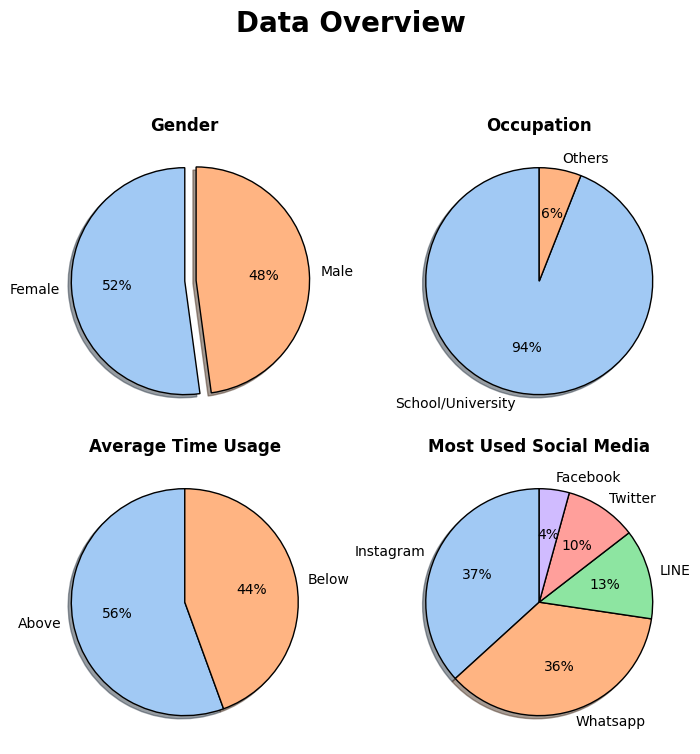

In [ ]:
J = data['Sex'].value_counts()
P = data['Occupation'].value_counts()
S = data['Average'].value_counts()
LW = data['Most Used'].value_counts()

fig, ax = plt.subplots(nrows=2, ncols=2)

colors = sns.color_palette('pastel')
explode = (0, 0.1)
explode2 = (0.2, 0)

plt.title('Data Overview')
plt.tight_layout()
ax[0,0].pie(J, labels=J.index, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0,0].set_title('Gender', fontweight='bold')
ax[0,1].pie(P, labels=P.index, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[0,1].set_title('Occupation', fontweight='bold')
ax[1,0].pie(S, labels=S.index, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[1,0].set_title('Average Time Usage', fontweight='bold')
ax[1,1].pie(LW, labels=LW.index, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[1,1].set_title('Most Used Social Media', fontweight='bold')

fig.suptitle('Data Overview', fontsize=20, y=1.07, fontweight='bold', x=0.5)
fig.set_figheight(7)
fig.set_figwidth(7)
fig.tight_layout()

plt.show()

## Exploratory Data Analysis for School/University Students


Since our analysis scope is School/University Students, we have to drop down the column that are not the part of our scope

In [ ]:
#Deleting row which is not Student/University respondent
datauni = data[data['Occupation'] != 'Others']
print(datauni)

        Sex         Occupation  Most Used Average  Disrupting Productivity  \
0      Male  School/University  Instagram   Above                        4   
1      Male  School/University  Instagram   Below                        3   
2    Female  School/University   Whatsapp   Above                        3   
4      Male  School/University   Whatsapp   Above                        4   
5      Male  School/University       LINE   Above                        2   
..      ...                ...        ...     ...                      ...   
113    Male  School/University    Twitter   Below                        5   
114    Male  School/University       LINE   Above                        3   
115    Male  School/University  Instagram   Above                        5   
116    Male  School/University  Instagram   Below                        4   
117  Female  School/University   Whatsapp   Below                        4   

     Wasting Time  Lack of self-control  Unaware of Time  FOMO 

it is known that there are 111 respondent who are in School/University

In [ ]:
datauni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 117
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sex                         110 non-null    object
 1   Occupation                  110 non-null    object
 2   Most Used                   110 non-null    object
 3   Average                     110 non-null    object
 4   Disrupting Productivity     110 non-null    int64 
 5   Wasting Time                110 non-null    int64 
 6   Lack of self-control        110 non-null    int64 
 7   Unaware of Time             110 non-null    int64 
 8   FOMO                        110 non-null    int64 
 9   Mindless Usage              110 non-null    int64 
 10  Disrupting Focus            110 non-null    int64 
 11  Attempt to Break Addiction  110 non-null    object
 12  Struggle to Break           110 non-null    object
 13  Urge to Use                 110 non-null    object

In [ ]:
datauni.describe()

,Disrupting Productivity,Wasting Time,Lack of self-control,Unaware of Time,FOMO,Mindless Usage,Disrupting Focus
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,3.490909,3.545455,3.436364,3.654545,2.845455,3.118182,2.609091
std,0.983772,1.054796,1.036289,1.035484,1.118537,1.046899,1.014532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


From 111 School/University Respodent who take the survey, it can be known :

*   Respondents believe that social media disrupts productivity with an average of 3.49. This means that on average, respondents productivity **Sometimes disrupted by social media**.

*   Respondents feel they waste time when opening social media with an average of 3.54. This means that on average, respondents **Often feel they waste time** when opening social media.

*   Respondents feel they cannot control themselves in using social media with an average of 3.43. This means that on average, respondents **Sometimes feel they cannot control themselves** in using social media.

*   Respondents become unaware of time when using social media with an average of 3.65. This means that on average, respondents **Often become unaware of time** when using social media.

*   Respondents feel afraid when they cannot access social media (FOMO) with an average of 2.84. This means that on average, respondents **Sometimes feel afraid when they cannot access social media**.

*   Respondents open social media without purpose with an average of 3.11. This means that on average, respondents **Sometimes open social media without purpose**.

*   Respondents have disrupted focus because of thinking about social media when doing a task with an average of 2.61. This means that on average, respondents **Sometimes they have disrupted focus when doing a task**.



<Axes: xlabel='Average', ylabel='Disrupting Productivity Score'>

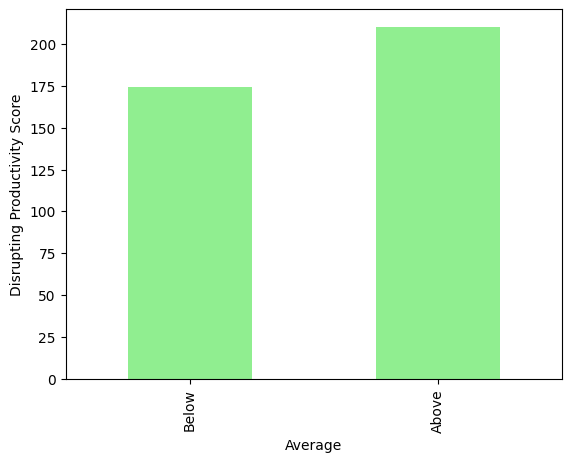

In [ ]:
##Create more EDA on usage time to the behaviour and mental effect

datauni.groupby('Average')['Disrupting Productivity'].sum().sort_values(ascending=True).plot.bar(ylabel='Disrupting Productivity Score', color='lightgreen')

The graph shown that the group who using social media below average has higher average on disrupting productivity,
Which mean using social media above average it's not significant factor that contributed to disrupting productivity

<Axes: xlabel='Average', ylabel='Wasting Time Score'>

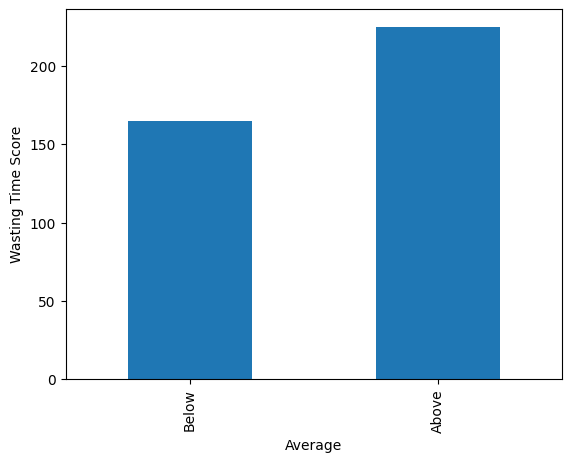

In [ ]:
datauni.groupby('Average')['Wasting Time'].sum().sort_values(ascending=True).plot.bar(ylabel='Wasting Time Score')

The graph shown that the group who use social media above average has higher average for Wasting Time,
Which mean there are indication that using social media above average could lead to more Time Waste

<Axes: xlabel='Average', ylabel='Lack of self-control Score'>

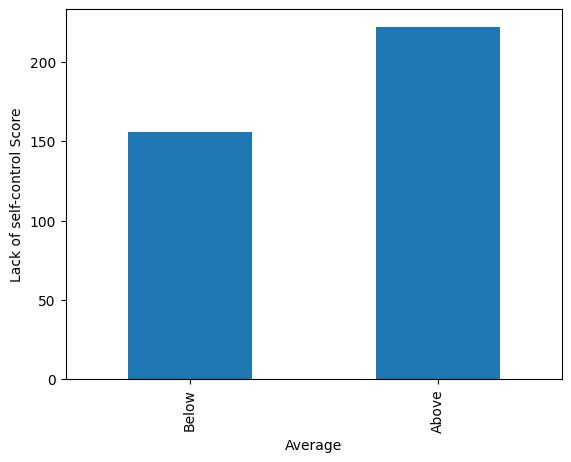

In [ ]:
datauni.groupby('Average')['Lack of self-control'].sum().sort_values(ascending=True).plot.bar(ylabel='Lack of self-control Score')

The graph shown that the group who using social media above average has higher average on Lack of self-control,
Which indicates that there is a correlation between the higher the consumption the more negative impact it has on self-control

<Axes: xlabel='Average', ylabel='Unaware of Time Score'>

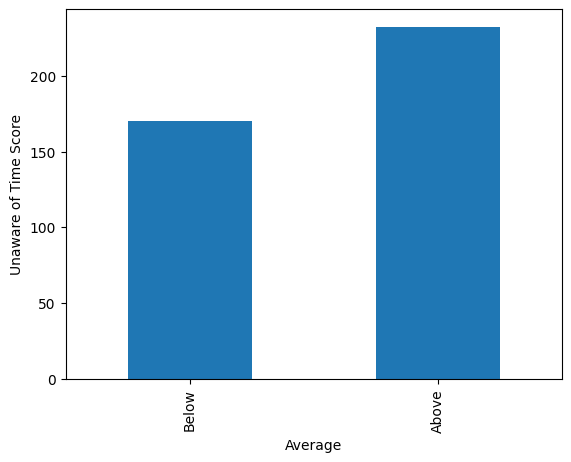

In [ ]:
datauni.groupby('Average')['Unaware of Time'].sum().sort_values(ascending=True).plot.bar(ylabel='Unaware of Time Score')

The graph shown the group who using social media above average has higher average score on Unaware of time,
Which indicates that the higher the consumption the more they are unaware of the time.

<Axes: xlabel='Average', ylabel='FOMO Score'>

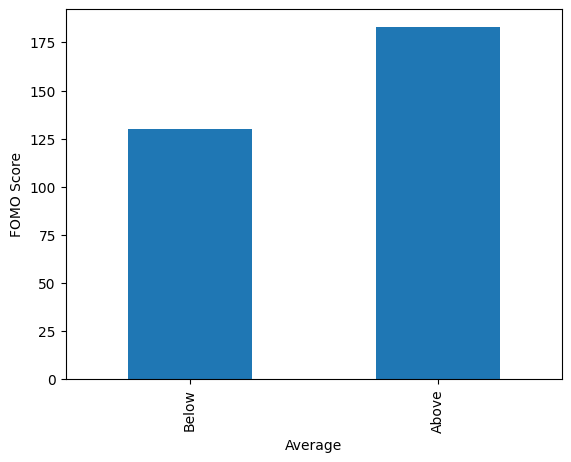

In [ ]:
datauni.groupby('Average')['FOMO'].sum().sort_values(ascending=True).plot.bar(ylabel='FOMO Score')

The graph shown that the group who using social media above average has higher average score on FOMO,
Which indicates that the higher the consumption, the more like they will experience FOMO (Fear of Missing Out)

<Axes: xlabel='Average', ylabel='Mindless Usage Score'>

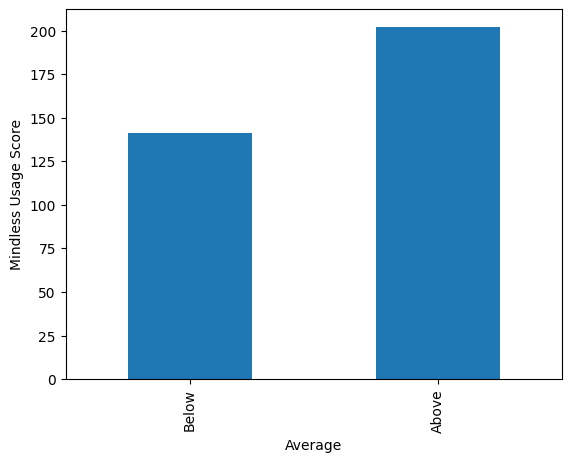

In [ ]:
datauni.groupby('Average')['Mindless Usage'].sum().sort_values(ascending=True).plot.bar(ylabel='Mindless Usage Score')

From the graph above, it also shown that the group who using social media above average have a higher average score on Mindless Usage,
Which indicates that the higher the consumption the more likely they Mindlessly consume social media.

<Axes: xlabel='Average', ylabel='Disrupting Focus Score'>

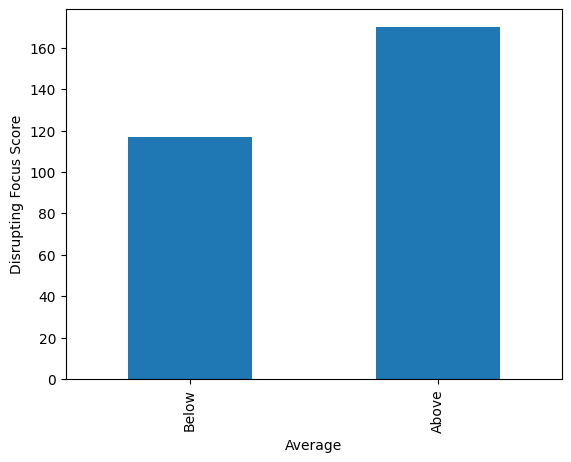

In [ ]:
datauni.groupby('Average')['Disrupting Focus'].sum().sort_values(ascending=True).plot.bar(ylabel='Disrupting Focus Score')

From the graph above, the group who using social media above average has higher average score on disrupting focus
Which indicates that the higher the consumption, the more likely they experience a distracted mind while doing tasks.

####Conclusion
From all the graph above, we could know that there is a correlation between a higher consumption of social media and negative mental effect.
Which leads to indicate that the higher the consumption, the more likely a person will experience a negative mental effect and lowering performance, but not significantly

###More Exploratory on Social Media Consumption and The Behaviour Effect

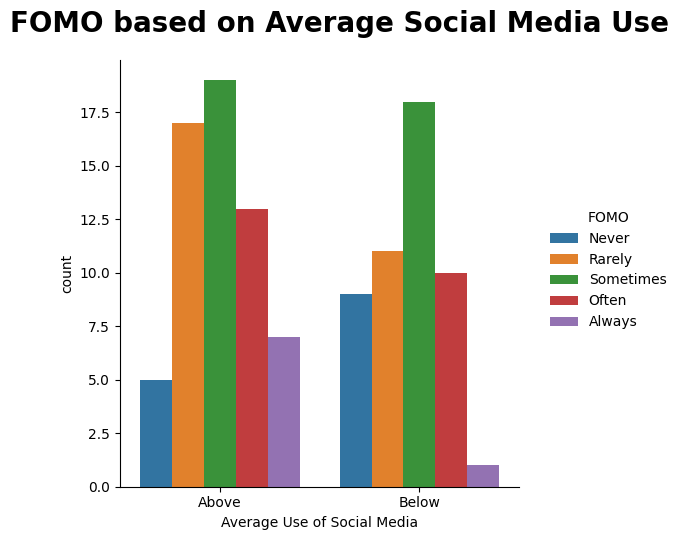

In [ ]:
data_temp = datauni.sort_values(['FOMO', 'Average'])
data_temp['FOMO'] = data_temp['FOMO'].replace(1, 'Never').replace(2, 'Rarely').replace(3, 'Sometimes').replace(4, 'Often').replace(5, 'Always')

sns.catplot(x='Average', hue='FOMO', data=data_temp, kind='count')

plt.suptitle('FOMO based on Average Social Media Use', fontsize=20, y=1.07, fontweight='bold', x=0.5)
plt.xlabel('Average Use of Social Media')

plt.show()

In [ ]:
#calculating the usage on never
n1=((datauni['Average'] == 'Above') & (datauni['FOMO'] == 1)).sum()
n2=((datauni['Average'] == 'Below') & (datauni['FOMO'] == 1)).sum()

(n2/(n1+n2))*100

64.28571428571429

In [ ]:
#calculating the usage on always
a1=((datauni['Average'] == 'Above') & (datauni['FOMO'] == 5)).sum()
a2=((datauni['Average'] == 'Below') & (datauni['FOMO'] == 5)).sum()
(a1/(a1+a2))*100

87.5

From the FOMO Data Visualization based on Average time use of social media :


*   Respondent who answer **Never** experience FOMO while cannot access social media, **64% are using social media below global average social media usage**.
*   Respondent who answer **Always** experience FOMO while cannot access social media, **87.5% are using social media above global average social media usage**.



###Average Time Usage and correlation with Attempt to Break Addiction,	Struggle to Break,	Urge to Use, and	Using app restriction

In [ ]:
addict = ["Attempt to Break Addiction","Struggle to Break","Urge to Use","Using app restriction"]
datauni[addict].describe()

,Attempt to Break Addiction,Struggle to Break,Urge to Use,Using app restriction
count,110,110,110,110
unique,2,2,2,2
top,Attempted,Yes,Yes,No
freq,99,71,61,82


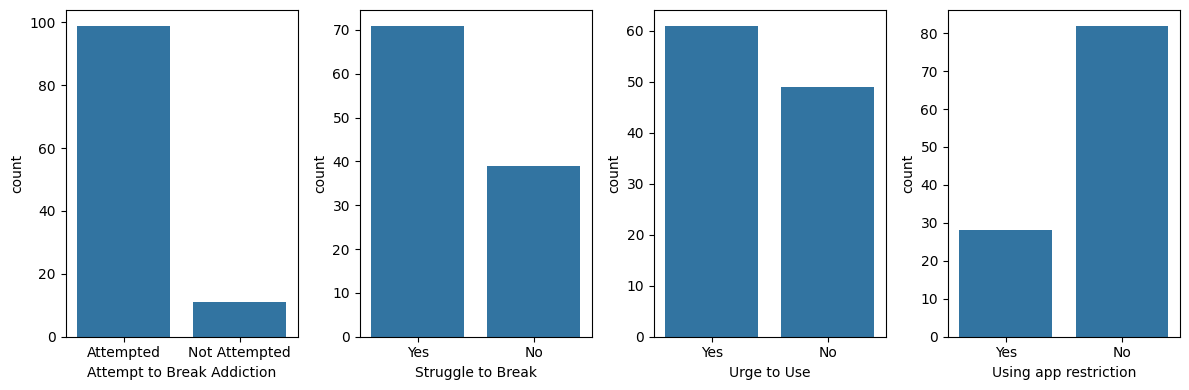

In [ ]:
plt.figure(figsize=(12,4))

features = addict
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=datauni[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

<Axes: xlabel='Average', ylabel='count'>

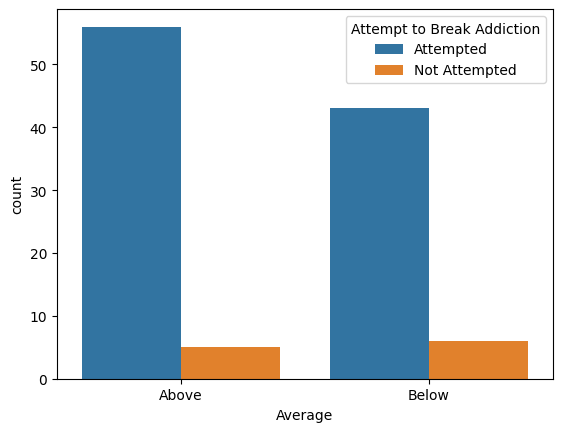

In [ ]:
sns.countplot(data=datauni, x='Average', hue='Attempt to Break Addiction')

From the graph above we could know both group are equally high in attempt to break from social media. \
The group who has above average use are attempted to break addiction more than the grup who are below average

<Axes: xlabel='Average', ylabel='count'>

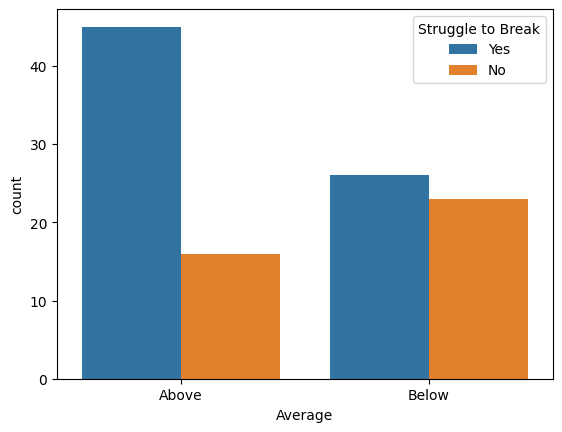

In [ ]:
sns.countplot(data=datauni, x='Average', hue='Struggle to Break')

From the graph we could know that the group who in above average use are **significantly struggle to break from the social media.**

<Axes: xlabel='Average', ylabel='count'>

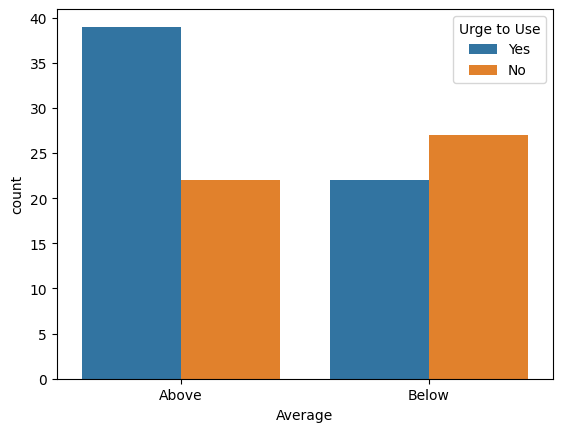

In [ ]:
sns.countplot(data=datauni, x='Average', hue='Urge to Use')

From the graph we could know that the group who use social media **above average are significantly has the urge to use social media**

And the group who **spend less time on social media are less likely to feel the urge to use it frequently.**

<Axes: xlabel='Average', ylabel='count'>

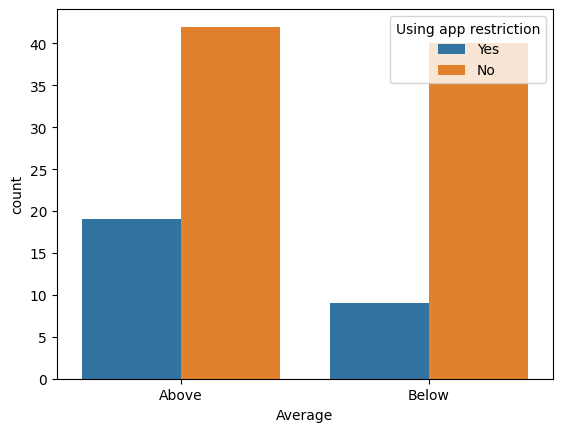

In [ ]:
sns.countplot(data=datauni, x='Average', hue='Using app restriction')

From the graph, both group are equally not using app restriction

###Correlation


###Converting object type data to numerical values

In [ ]:
datauni.head()

,Sex,Occupation,Most Used,Average,Disrupting Productivity,Wasting Time,Lack of self-control,Unaware of Time,FOMO,Mindless Usage,Disrupting Focus,Attempt to Break Addiction,Struggle to Break,Urge to Use,Using app restriction
0,Male,School/University,Instagram,Above,4,5,5,5,5,5,5,Attempted,Yes,Yes,Yes
1,Male,School/University,Instagram,Below,3,3,3,3,4,2,3,Attempted,Yes,Yes,No
2,Female,School/University,Whatsapp,Above,3,4,4,4,3,2,3,Attempted,Yes,Yes,No
4,Male,School/University,Whatsapp,Above,4,5,4,4,2,3,2,Attempted,Yes,Yes,No
5,Male,School/University,LINE,Above,2,2,3,2,2,4,2,Attempted,No,Yes,No


In [ ]:
MostUsed=set(datauni['Most Used'])
print(MostUsed)

{'Facebook', 'Twitter', 'Whatsapp', 'Instagram', 'LINE'}


In [ ]:
datauni.loc[data['Sex'] == 'Female', 'Sex'] = 0
datauni.loc[data['Sex'] == 'Male', 'Sex'] = 1
datauni.loc[data['Occupation'] == 'Others', 'Occupation'] = 0
datauni.loc[data['Occupation'] == 'School/University', 'Occupation'] = 1
datauni.loc[data['Most Used'] == 'Instagram', 'Most Used'] = 0
datauni.loc[data['Most Used'] == 'LINE', 'Most Used'] = 1
datauni.loc[data['Most Used'] == 'Facebook', 'Most Used'] = 2
datauni.loc[data['Most Used'] == 'Twitter', 'Most Used'] = 3
datauni.loc[data['Most Used'] == 'Whatsapp', 'Most Used'] = 4
datauni.loc[data['Average'] == 'Below', 'Average'] = 0
datauni.loc[data['Average'] == 'Above', 'Average'] = 1
datauni.loc[data['Attempt to Break Addiction'] == 'Not Attempted', 'Attempt to Break Addiction'] = 0
datauni.loc[data['Attempt to Break Addiction'] == 'Attempted', 'Attempt to Break Addiction'] = 1
datauni.loc[data['Struggle to Break'] == 'No', 'Struggle to Break'] = 0
datauni.loc[data['Struggle to Break'] == 'Yes', 'Struggle to Break'] = 1
datauni.loc[data['Urge to Use'] == 'No', 'Urge to Use'] = 0
datauni.loc[data['Urge to Use'] == 'Yes', 'Urge to Use'] = 1
datauni.loc[data['Using app restriction'] == 'No', 'Using app restriction'] = 0
datauni.loc[data['Using app restriction'] == 'Yes', 'Using app restriction'] = 1

In [ ]:
datauni['Sex'] = datauni['Sex'].astype('int64')
datauni['Occupation'] = datauni['Occupation'].astype('int64')
datauni['Most Used'] = datauni['Most Used'].astype('int64')
datauni['Average'] = datauni['Average'].astype('int64')
datauni['Attempt to Break Addiction'] = datauni['Attempt to Break Addiction'].astype('int64')
datauni['Struggle to Break'] = datauni['Struggle to Break'].astype('int64')
datauni['Urge to Use'] = datauni['Urge to Use'].astype('int64')
datauni['Using app restriction'] = datauni['Using app restriction'].astype('int64')
datauni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 117
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Sex                         110 non-null    int64
 1   Occupation                  110 non-null    int64
 2   Most Used                   110 non-null    int64
 3   Average                     110 non-null    int64
 4   Disrupting Productivity     110 non-null    int64
 5   Wasting Time                110 non-null    int64
 6   Lack of self-control        110 non-null    int64
 7   Unaware of Time             110 non-null    int64
 8   FOMO                        110 non-null    int64
 9   Mindless Usage              110 non-null    int64
 10  Disrupting Focus            110 non-null    int64
 11  Attempt to Break Addiction  110 non-null    int64
 12  Struggle to Break           110 non-null    int64
 13  Urge to Use                 110 non-null    int64
 14  Using app 

<ipython-input-40-a26632331509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datauni['Sex'] = datauni['Sex'].astype('int64')
<ipython-input-40-a26632331509>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datauni['Occupation'] = datauni['Occupation'].astype('int64')
<ipython-input-40-a26632331509>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

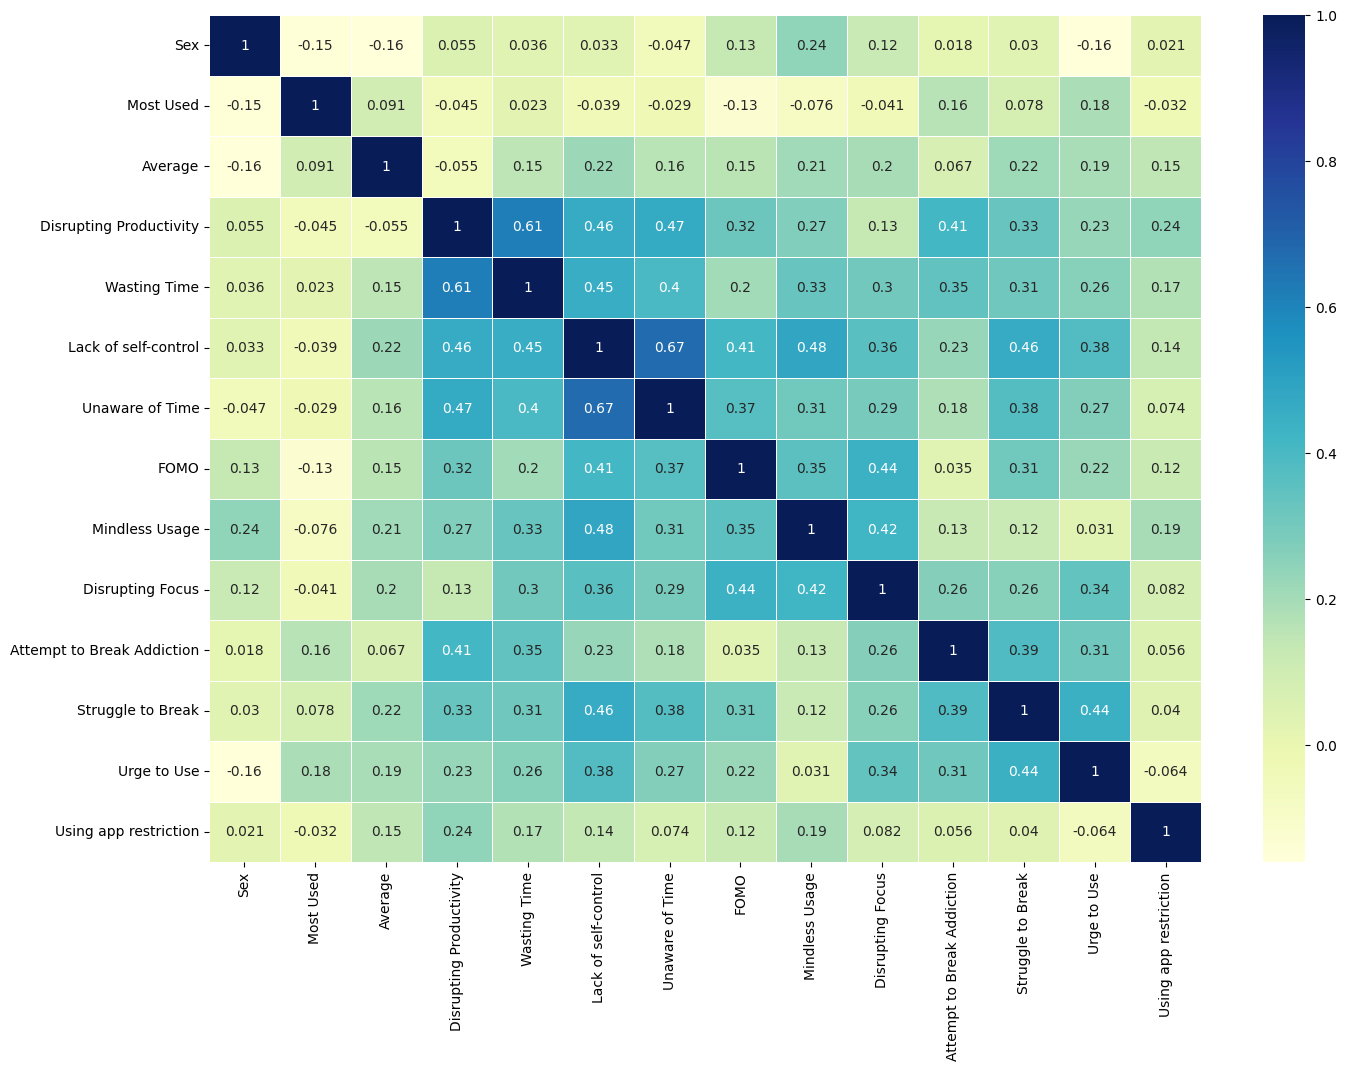

In [ ]:
coorcolumn = datauni.drop(['Occupation'], axis = 1)
plt.figure(figsize=(16, 11))
sns.heatmap(coorcolumn.corr(), linewidths=0.5, annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
datauni.to_csv('/content/drive/MyDrive/TETRIS Program/Capstone/pr.stud_analysis.csv', index=False)

# Predictive Modelling

In [ ]:
datauni.head()

,Sex,Occupation,Most Used,Average,Disrupting Productivity,Wasting Time,Lack of self-control,Unaware of Time,FOMO,Mindless Usage,Disrupting Focus,Attempt to Break Addiction,Struggle to Break,Urge to Use,Using app restriction
0,1,1,0,1,4,5,5,5,5,5,5,1,1,1,1
1,1,1,0,0,3,3,3,3,4,2,3,1,1,1,0
2,0,1,4,1,3,4,4,4,3,2,3,1,1,1,0
4,1,1,4,1,4,5,4,4,2,3,2,1,1,1,0
5,1,1,1,1,2,2,3,2,2,4,2,1,0,1,0


The primary analysis assesses if each variable directly affects a person's overall productivity. We will aggregate the scores of all variables into a binary option.

If a person scores 75% (24, a rounded figure) out of the maximum total score for all attributed variables (with a max score of 35), they will be classified as 1 (indicating low productivity), and vice versa.

In [ ]:
#Create new column for aggregate the score
Total = ['Disrupting Productivity','Wasting Time','Lack of self-control','Unaware of Time','FOMO', 'Mindless Usage','Disrupting Focus']
datauni['Total Score'] = datauni[Total].sum(axis=1)

<ipython-input-44-1c5bfd4cd2fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datauni['Total Score'] = datauni[Total].sum(axis=1)


And now we classified the total score

In [ ]:
def map_score(score):
  if score < 24.5:
    return "0"
  elif score >= 24.5:
    return "1"

datauni['Outcome']= datauni['Total Score'].apply(lambda score: map_score(score))
datauni['Outcome'] = datauni['Outcome'].astype('int64')

<ipython-input-45-e31525396e8a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datauni['Outcome']= datauni['Total Score'].apply(lambda score: map_score(score))
<ipython-input-45-e31525396e8a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datauni['Outcome'] = datauni['Outcome'].astype('int64')


Since we only take the necessary feature for modelling, we have to exclude the total score column

In [ ]:
#Selecting column for predictive modelling
pcol=datauni[['Sex','Average','Disrupting Productivity','Wasting Time','Lack of self-control','Unaware of Time','FOMO', 'Mindless Usage','Disrupting Focus','Outcome']]
pcol.head()

,Sex,Average,Disrupting Productivity,Wasting Time,Lack of self-control,Unaware of Time,FOMO,Mindless Usage,Disrupting Focus,Outcome
0,1,1,4,5,5,5,5,5,5,1
1,1,0,3,3,3,3,4,2,3,0
2,0,1,3,4,4,4,3,2,3,0
4,1,1,4,5,4,4,2,3,2,0
5,1,1,2,2,3,2,2,4,2,0


###Random Forest Classifier

In [ ]:
#importing necessary libraries for machine learning models

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pydot
standardizer = StandardScaler()

In [ ]:
#Splitting up the data into "Train" and "Test". 80% train, 20% test.
feature = datauni.drop(['Outcome'],axis=1)
target = datauni['Outcome']

#X = standardizer.fit_transform(X)
feature_train, feature_test, target_train, target_test = train_test_split(feature, target , test_size=0.25,random_state=42)

In [ ]:
# convert data into numpy arrays
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy().ravel()

In [ ]:
random_forest = RandomForestClassifier(max_depth=4,random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

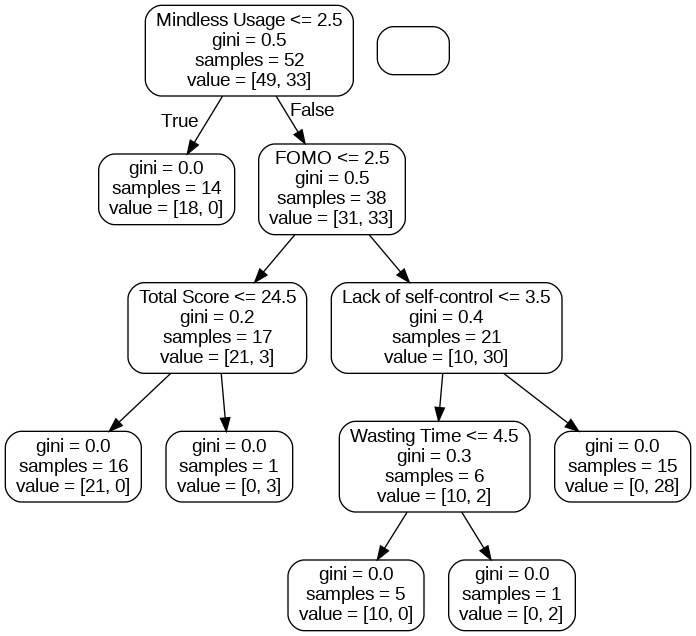

In [ ]:
tree = random_forest.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
from sklearn.metrics import accuracy_score

y_predict_train = tree.predict(X_train)

print(f"Accuracy on training data is {accuracy_score(y_train,y_predict_train)}")

Accuracy on training data is 0.9878048780487805


In [ ]:
# prepare test data as numpy arrays

X_test = feature_test.to_numpy()
y_test = target_test.to_numpy().ravel()

# accuracy score on test data
y_predict_test = tree.predict(X_test)

print(f"Accuracy on test data is {accuracy_score(y_test,y_predict_test)}")

Accuracy on test data is 0.8571428571428571


###Logistic Regression

In [ ]:
#Create Logistic regression model and GaussianNB model
model = LogisticRegression()
modelNB = GaussianNB()

In [ ]:
# Call LinearRegression() to predict.
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predicted = model.predict(X_test)
accuracy= model.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[19  0]
 [ 0  9]]


In [ ]:
print("Predicted Values using Logistic Regression: ", predicted)

Predicted Values using Logistic Regression:  [1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0]


In [ ]:
print("Accuracy of Logistic Regression: ",metrics.accuracy_score(y_test, predicted))

Accuracy of Logistic Regression:  1.0


In [ ]:
# Model Accuracy
print('Accuracy score using the Logistic regression model: ', accuracy*100,'%')

Accuracy score using the Logistic regression model:  100.0 %


###Gaussanian Naive Bayes

In [ ]:
#Create GaussianNB model
modelNB = GaussianNB()

In [ ]:
# Call GaussianNB() to to predict.
modelNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
predicted= modelNB.predict(X_test)
accuracy= modelNB.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[14  5]
 [ 1  8]]


In [ ]:
print("Predicted Values using Gaussian Naive Bayes Model: ", predicted)

Predicted Values using Gaussian Naive Bayes Model:  [0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0]


In [ ]:
print("Accuracy of Gaussian Naive Bayes Model: ",metrics.accuracy_score(y_test, predicted))

Accuracy of Gaussian Naive Bayes Model:  0.7857142857142857


In [ ]:
# Model Accuracy
print('Accuracy score using the Gaussian Naive Bayes Model: ', accuracy*100,'%')

Accuracy score using the Gaussian Naive Bayes Model:  78.57142857142857 %
